### Tools --->  Tool Calling ---> Agents

Docs: https://docs.langchain.com/oss/python/integrations/tools

<HR>

# What is a Tool ?
A tool is just a Python function (or API) that is packaged in a way the **LLM** can understand and call when needed.

---

LLM (like GPT) are great at:
- reasoning
- Language generation

---

But they **can't do things like**:
- Access live data(weather, news)
- Do reliable math
- Call APIs
- Run Code
- Interact with a database



## Types of Tools
1. Built-in Tools
2. Custom Tools

# 1. Built-in Tools
A built-in tool is a tool that LangChain already provides for you - it's pre-built, production ready, and requires minimal or no setup.

- You don't have to write the function logic yourself- you just import and use it

- like: <br>
`DuckDuckGoSearchRun`   Web Search via DuckDuckGo<br><br>
`WikipediaQueryRun` Wikipedia summary<br><br>
`PythonREPLTool` Run raw Python Code<br><br>
`ShellTool` Run shell commands<br><br>
`RequestsGetTool` Make HTTP GET requests<br><br>
`GmailSendMessageTool` Send emails via Gmail<br><br>
`SlackSendMessageTool` Post message to Slack<br><br>
`SQLDatabaseQueryTool` Run SQL queries<br><br>

# <center>  **Built-in Tools**

# 1. DuckDuckGo

In [2]:
from langchain_community.tools import DuckDuckGoSearchRun

In [6]:
search_tool = DuckDuckGoSearchRun()

In [7]:
results = search_tool.invoke('ipl_news')

In [8]:
results

'3 days ago · . [ Ipl auction, Ipl auction 2026, Ipl 2026, Ipl news, IPL updates, Ipl Mini Auction, Indian Premier League, Tata Ipl 2026, ] . . #iplauction #ipl2026 ... 2 days ago · Check IPL 2026 live score, squads, match schedules, points table, fixtures, updates, photos, and videos on ESPNcricinfo. 7 days ago · The official IPL website with live scores, match updates, team rankings, all the latest news, and videos . Follow your favorite teams and players! 2 days ago · The upcoming edition of IPL is expected to start on March 26, with the final to be played preferably on May 3. CricketIplIPL News. Get Latest real-time updates. 16 Dec 2025 · IPL Chairman Mr. Arun Singh Dhumal explains how far the #TATAIPL has come since its inception, and the role it has played in helping cricket evolve globally ...'

# 2. Shell Tool

In [9]:
from langchain_community.tools import ShellTool

In [10]:
shell_tool = ShellTool()

In [19]:
results = shell_tool.invoke("whoami")

Executing command:
 whoami


In [20]:
results

'mohitasus\\write\r\n'

# <center> **Custom Tools**

- A custom tool is a tool that you define yourself.

Use them when:
- You want to call **your ouwn APIs**
- You want to **encapsulate business logic**
- You want the LLM to interact with **your database, product, or app**

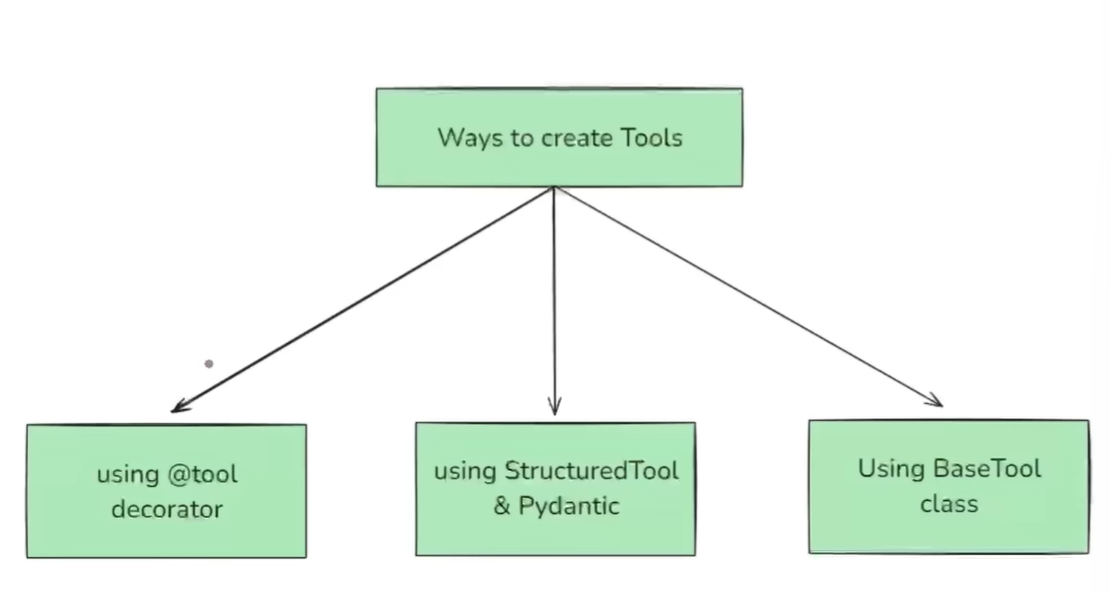

# 1. Using **@tool** decorator

In [22]:
from langchain_core.tools import tool

In [25]:
# Step-1 - Create a Function

def multiply(a, b):
    """ Multiply Two Numbers """ # highly recommanded to add doc string it will help the llm to understand
    return a * b



In [26]:
# Step 2 - Add Type Hint

# also highly recommanded to help LLM to understand what is the input and what will be the output
def multiply(a: int, b: int) -> int:
    """ Multiply Two Numbers """
    return a * b

In [32]:
# Step 3 - Add tool Decorator

# it is the important step, it makes that function the actual tool, and help llm to communicate with this function or help this function to communicate with llm

@tool
def multiply(a: int, b: int) -> int:
    """ Multiply Two Numbers """

    return a * b


In [31]:
result = multiply.invoke({"a": 3, "b": 4})
result

12

In [35]:
# tool has some  attributes
print(multiply.name)
print(multiply.description)
print(multiply.args)

multiply
Multiply Two Numbers
{'a': {'title': 'A', 'type': 'integer'}, 'b': {'title': 'B', 'type': 'integer'}}


In [43]:
# what actually llm gets
print(multiply.args_schema.model_json_schema())

{'description': 'Multiply Two Numbers ', 'properties': {'a': {'title': 'A', 'type': 'integer'}, 'b': {'title': 'B', 'type': 'integer'}}, 'required': ['a', 'b'], 'title': 'multiply', 'type': 'object'}


# 2. Using StructuredTool and Pydantic

A **Structured Tool** in LangChain is a special type of tool where the input to the tool follows a structured schema, typically defined using a Pydantic model.

In [50]:
from langchain_core.tools import StructuredTool
from pydantic import BaseModel, Field

In [51]:
class MultiplyInput(BaseModel):
    a: int = Field(required=True, description="The first number to add")
    b: int = Field(required=True, description="The second Number to add")

C:\Users\write\AppData\Local\Temp\ipykernel_16848\1897460457.py:2: PydanticDeprecatedSince20: Using extra keyword arguments on `Field` is deprecated and will be removed. Use `json_schema_extra` instead. (Extra keys: 'required'). Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  a: int = Field(required=True, description="The first number to add")
C:\Users\write\AppData\Local\Temp\ipykernel_16848\1897460457.py:3: PydanticDeprecatedSince20: Using extra keyword arguments on `Field` is deprecated and will be removed. Use `json_schema_extra` instead. (Extra keys: 'required'). Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  b: int = Field(required=True, description="The second Number to add")


In [56]:
def multiply_func(a: int, b: int) -> int:
    """ Multiply Two Given Values """
    return a * b

In [55]:
multiply_tool = StructuredTool.from_function(
    func=multiply_func,
    name="Multiple Tool",
    description="Multiple Two Numbera",
    args_schema=MultiplyInput,
)

In [57]:
result = multiply_tool.invoke({"a": 3, "b": 5})

In [59]:
result

15

In [62]:
print(multiply_tool.name)
print(multiply_tool.description)
print(multiply_tool.args)

Multiple Tool
Multiple Two Numbera
{'a': {'description': 'The first number to add', 'required': True, 'title': 'A', 'type': 'integer'}, 'b': {'description': 'The second Number to add', 'required': True, 'title': 'B', 'type': 'integer'}}


# 3. Using BaseTool Class

- **BaseTool** is the abstract base class for all tools in LangChain.
- It defines the core structure and interface that any tool must follow.
- whether it's a simple one-liner or a fully customized function.

- - All other tool types like **@tool, StructuredTool** are built on top of BaseTool

In [63]:
from langchain.tools import BaseTool
from typing import Type

In [64]:
# args schema using pydantic

class MultiplyInput(BaseModel):
    a: int = Field(required=True, description="The First Number to Add")
    a: int = Field(required=True, description="The Second Number to Add")


C:\Users\write\AppData\Local\Temp\ipykernel_16848\32500825.py:4: PydanticDeprecatedSince20: Using extra keyword arguments on `Field` is deprecated and will be removed. Use `json_schema_extra` instead. (Extra keys: 'required'). Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  a: int = Field(required=True, description="The First Number to Add")
C:\Users\write\AppData\Local\Temp\ipykernel_16848\32500825.py:5: PydanticDeprecatedSince20: Using extra keyword arguments on `Field` is deprecated and will be removed. Use `json_schema_extra` instead. (Extra keys: 'required'). Deprecated in Pydantic V2.0 to be removed in V3.0. See Pydantic V2 Migration Guide at https://errors.pydantic.dev/2.12/migration/
  a: int = Field(required=True, description="The Second Number to Add")


In [65]:
class MultiplyTool(BaseModel):
    name: str = "multiply"
    description: str = "Multiply Two Numbers"

    args_schema: Type[BaseModel] = MultiplyInput

    def _run(self, a: int, b: int) -> int:
        return a * b

# Toolkits

A toolkit is just a collection (bundle) of related tools that serve a common purpose - packaged together for convenience and **reusability**

In LangChain:
- A toolkit might be: `GoogleDriveToolKit`
- And it can contain the following tools

- `GoogleDriveCreateFileTool`: Upload a file
- `GoogleDriveSearchTool`: Search for a file by name/content
- `GoogleDriveReadFileTool`: Read contents of a file

In [68]:
# we need related types of multiple tools
from langchain_core.tools import tool

In [70]:
# Custom Tools

@tool
def add(a: int, b: int) -> int:
    """ Add two numbers """
    return a + b

@tool
def multiply(a: int, b: int) -> int:
    """ Multiply two numbers """
    return a * b

In [71]:
class MathToolKit:
    def get_tools(self):
        return [add, multiply]

In [72]:
toolkit = MathToolKit()

In [73]:
toolkit

In [74]:
tools = toolkit.get_tools()
tools

[StructuredTool(name='add', description='Add two numbers', args_schema=<class 'langchain_core.utils.pydantic.add'>, func=<function add at 0x00000162457F8360>),
 StructuredTool(name='multiply', description='Multiply two numbers', args_schema=<class 'langchain_core.utils.pydantic.multiply'>, func=<function multiply at 0x00000162457F9940>)]

In [76]:
for tool in tools:
    print(tool.name, "=>", tool.description)

add => Add two numbers
multiply => Multiply two numbers
